In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

In [26]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:

base_path = '/content/drive/MyDrive/animals'

cats_img = []
dogs_img = []
panda_img = []

In [29]:

def load_images(folder, max_images=100):
    images = []
    count = 0
    valid_extensions = {'.jpg', '.jpeg', '.png'}

    print(f"\nChecking folder: {folder}")
    files = os.listdir(folder)
    print(f"Found {len(files)} files in folder")

    for filename in files:
        if count >= max_images:
            break

        ext = os.path.splitext(filename)[1].lower()
        if ext not in valid_extensions:
            continue

        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (300, 300))
                images.append(img)
                count += 1
            else:
                print(f"Failed to read: {img_path}")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

    print(f"Loaded {count} images from {folder}")
    return images

base_path = '/content/drive/MyDrive/animals'
print(f"Base path contents: {os.listdir(base_path)}")

# Corrected variable names (consistent with the if statements below)
cat_imgs = []
dog_imgs = []
panda_imgs = []

for animal_folder in os.listdir(base_path):
    animal_path = os.path.join(base_path, animal_folder)
    if os.path.isdir(animal_path):
        print(f"\nProcessing: {animal_folder}")
        if animal_folder.lower() == "cats":
            cat_imgs = load_images(animal_path)
        elif animal_folder.lower() == "dogs":
            dog_imgs = load_images(animal_path)
        elif animal_folder.lower() == "panda":
            panda_imgs = load_images(animal_path)

print("\nFinal counts:")
print(f"Cat images: {len(cat_imgs)}")  # Changed from cats_imgs to cat_imgs
print(f"Dog images: {len(dog_imgs)}")  # Changed from dogs_imgs to dog_imgs
print(f"Panda images: {len(panda_imgs)}")

Base path contents: ['dogs', 'panda', 'cats']

Processing: dogs

Checking folder: /content/drive/MyDrive/animals/dogs
Found 100 files in folder
Loaded 100 images from /content/drive/MyDrive/animals/dogs

Processing: panda

Checking folder: /content/drive/MyDrive/animals/panda
Found 100 files in folder
Loaded 100 images from /content/drive/MyDrive/animals/panda

Processing: cats

Checking folder: /content/drive/MyDrive/animals/cats
Found 100 files in folder
Loaded 100 images from /content/drive/MyDrive/animals/cats

Final counts:
Cat images: 100
Dog images: 100
Panda images: 100


In [30]:
if cat_imgs:
    cat_imgs = np.array(cat_imgs)
if dog_imgs:
    dog_imgs = np.array(dog_imgs)
if panda_imgs:
    panda_imgs = np.array(panda_imgs)

In [31]:
def convert_grayscale(images):
    gray_images = []
    for img in images:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray_images.append(gray_img)
    return np.array(gray_images)

# Convert each animal's images to grayscale if they exist
cat_gray = convert_grayscale(cat_imgs) if len(cat_imgs) > 0 else []
dog_gray = convert_grayscale(dog_imgs) if len(dog_imgs) > 0 else []
panda_gray = convert_grayscale(panda_imgs) if len(panda_imgs) > 0 else []

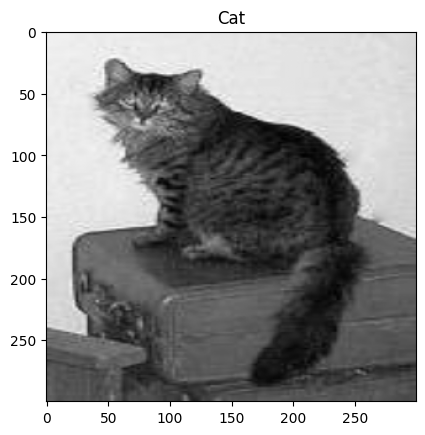

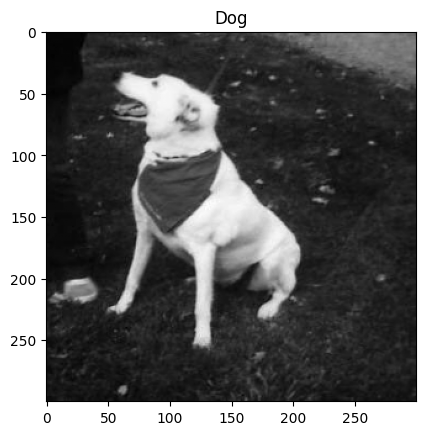

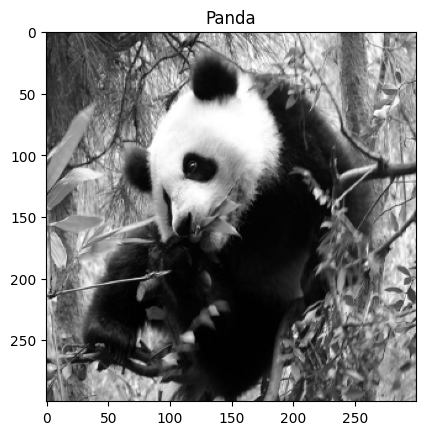

In [32]:
if len(cat_gray) > 0:
    plt.imshow(cat_gray[0], cmap='gray')
    plt.title('Cat')
    plt.show()

if len(dog_gray) > 0:
    plt.imshow(dog_gray[0], cmap='gray')
    plt.title('Dog')
    plt.show()

if len(panda_gray) > 0:
    plt.imshow(panda_gray[0], cmap='gray')
    plt.title('Panda')
    plt.show()

In [33]:
import random

def create_folds(data, num_folds=5):
    random.shuffle(data)
    fold_size = len(data) // num_folds
    folds = []
    for i in range(num_folds):
        start_index = i * fold_size
        end_index = (i + 1) * fold_size if i < num_folds - 1 else len(data)
        folds.append(data[start_index:end_index])
    return folds

# Combine all animal images
all_img = []
if len(cat_gray) > 0:
    all_img.extend(cat_gray)
if len(dog_gray) > 0:
    all_img.extend(dog_gray)
if len(panda_gray) > 0:
    all_img.extend(panda_gray)

# Create 5-fold cross-validation sets
folds = create_folds(all_img, num_folds=5)

# Print fold information
for i in range(5):
    print(f"Fold {i+1}:")
    validation_set = folds[i]
    training_set = [image for j, fold in enumerate(folds) if j != i for image in fold]
    print(f"  Training images: {len(training_set)}")
    print(f"  Validation images: {len(validation_set)}")
    print("-" * 30)

Fold 1:
  Training images: 240
  Validation images: 60
------------------------------
Fold 2:
  Training images: 240
  Validation images: 60
------------------------------
Fold 3:
  Training images: 240
  Validation images: 60
------------------------------
Fold 4:
  Training images: 240
  Validation images: 60
------------------------------
Fold 5:
  Training images: 240
  Validation images: 60
------------------------------


In [34]:
def calculate_distances(test_image, training_set):
    """Calculate Euclidean distances between test image and all training images"""
    distances = [np.sqrt(np.sum(np.square(test_image - train_image))) for train_image in training_set]
    return distances

def knn(training_set, validation_set, k=5):
    """K-Nearest Neighbors classifier for animal images"""
    pred_lbls = []
    for test_image in validation_set:
        # Calculate distances to all training images
        distances = calculate_distances(test_image, [x[0] for x in training_set])

        # Get indices of k nearest neighbors
        nearest_neighbor_indices = np.argsort(distances)[:k]

        # Get labels of nearest neighbors (1=cat, 2=dog, 3=panda)
        neigh_lbl = [training_set[i][1] for i in nearest_neighbor_indices]

        # Predict the most common label among neighbors
        pred_lbl = max(set(neigh_lbl), key=neigh_lbl.count)
        pred_lbls.append(pred_lbl)

    return pred_lbls

In [35]:
# Create numeric labels (0=cat, 1=dog, 2=panda)
labels = [0] * len(cat_gray) + [1] * len(dog_gray) + [2] * len(panda_gray)

# Combine images with their labels
all_img_lbls = list(zip(all_img, labels))

# Test different k values from 1 to 30
k_values = list(range(1, 31))
fold_accuracies = {k: [] for k in k_values}

# Create 5 folds with labels
folds_with_labels = create_folds(all_img_lbls, num_folds=5)

# Perform 5-fold cross-validation
for i in range(5):
    print(f"\nFold {i+1}:")
    validation_set_with_labels = folds_with_labels[i]
    training_set_with_labels = [
        image_label for j, fold in enumerate(folds_with_labels) if j != i for image_label in fold
    ]

    # Test each k value
    for k in k_values:
        pred_lbls = knn(training_set_with_labels, [x[0] for x in validation_set_with_labels], k=k)
        true_labels = [x[1] for x in validation_set_with_labels]

        # Calculate accuracy
        correct_pred = sum(1 for predicted, true in zip(pred_lbls, true_labels) if predicted == true)
        accuracy = correct_pred / len(true_labels) if len(true_labels) > 0 else 0
        fold_accuracies[k].append(accuracy)
        print(f"  k={k:2d}: Accuracy = {accuracy:.4f}")

# Calculate and print average accuracies
print("\nAverage Accuracies Across All Folds:")
for k, accuracies in fold_accuracies.items():
    average_accuracy = sum(accuracies) / len(accuracies)
    print(f"k={k:2d}: {average_accuracy:.4f}")

# Find the best k value
best_k = max(fold_accuracies.items(), key=lambda x: sum(x[1])/len(x[1]))[0]
print(f"\nBest k value: {best_k} with average accuracy {max(fold_accuracies[best_k]):.4f}")


Fold 1:
  k= 1: Accuracy = 0.3167
  k= 2: Accuracy = 0.2833
  k= 3: Accuracy = 0.3167
  k= 4: Accuracy = 0.3167
  k= 5: Accuracy = 0.3167
  k= 6: Accuracy = 0.3500
  k= 7: Accuracy = 0.3500
  k= 8: Accuracy = 0.4167
  k= 9: Accuracy = 0.3833
  k=10: Accuracy = 0.4000
  k=11: Accuracy = 0.3667
  k=12: Accuracy = 0.3833
  k=13: Accuracy = 0.4167
  k=14: Accuracy = 0.3833
  k=15: Accuracy = 0.3000
  k=16: Accuracy = 0.3000
  k=17: Accuracy = 0.3000
  k=18: Accuracy = 0.3000
  k=19: Accuracy = 0.2833
  k=20: Accuracy = 0.2667
  k=21: Accuracy = 0.3000
  k=22: Accuracy = 0.3333
  k=23: Accuracy = 0.2667
  k=24: Accuracy = 0.3167
  k=25: Accuracy = 0.3167
  k=26: Accuracy = 0.3333
  k=27: Accuracy = 0.3167
  k=28: Accuracy = 0.3000
  k=29: Accuracy = 0.3167
  k=30: Accuracy = 0.3167

Fold 2:
  k= 1: Accuracy = 0.3167
  k= 2: Accuracy = 0.3333
  k= 3: Accuracy = 0.3000
  k= 4: Accuracy = 0.3500
  k= 5: Accuracy = 0.3333
  k= 6: Accuracy = 0.3500
  k= 7: Accuracy = 0.3333
  k= 8: Accuracy = 0

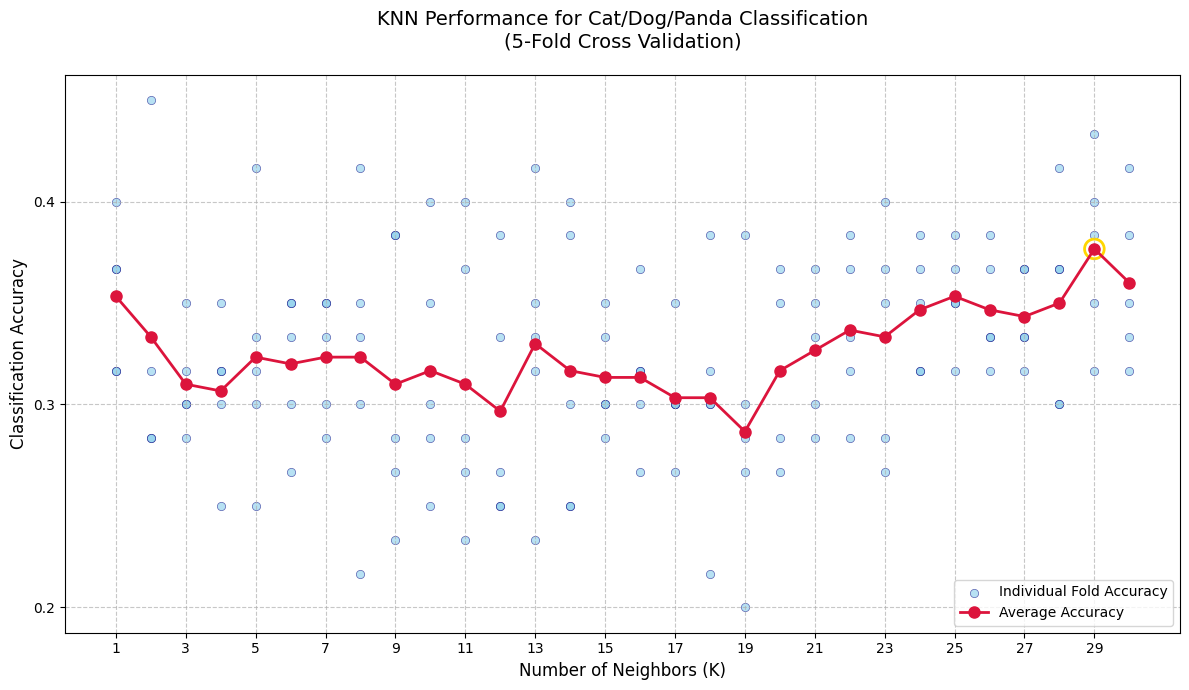

In [36]:
# Calculate average accuracies
average_accuracies = {k: sum(accs)/len(accs) for k, accs in fold_accuracies.items()}

# Create the plot
plt.figure(figsize=(12, 7))

# 1. Plot individual fold accuracies (transparent markers)
for k, accs in fold_accuracies.items():
    plt.scatter([k]*len(accs), accs,
               color='skyblue',
               alpha=0.6,
               edgecolor='navy',
               linewidth=0.5,
               label='Individual Fold Accuracy' if k == 1 else "")

# 2. Plot average accuracy line (bold with markers)
plt.plot(list(average_accuracies.keys()),
         list(average_accuracies.values()),
         marker='o',
         color='crimson',
         linewidth=2,
         markersize=8,
         label='Average Accuracy')

# Formatting
plt.title('KNN Performance for Cat/Dog/Panda Classification\n(5-Fold Cross Validation)',
          pad=20, fontsize=14)
plt.xlabel('Number of Neighbors (K)', fontsize=12)
plt.ylabel('Classification Accuracy', fontsize=12)
plt.xticks(range(1, 31, 2))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')

# Highlight the best K value
best_k = max(average_accuracies.items(), key=lambda x: x[1])[0]
best_acc = average_accuracies[best_k]
plt.scatter(best_k, best_acc, s=200,
            facecolors='none', edgecolors='gold',
            linewidths=2, label=f'Best K (k={best_k})')

plt.tight_layout()
plt.show()